# Ensure that Python implementation works the same as old Matlab implementation

## Load packages

In [3]:
import numpy as np
import pim_tmr as pim
from scipy.io import loadmat
import matplotlib.pyplot as plt

## Import old measurement data

In [4]:
data = loadmat('imports/diffuser/matMeas.mat') # Contains A and B keys: A = input phases, B = output intensities
result = loadmat('imports/diffuser/X_16f_64d_20N.mat') # Contains XkNorm key, the old retrieved transfer matrix

A = data['A'][10:330,:]
B = data['B'][10:330,:]
A = np.exp(1j * A)
B = np.sqrt(B)
X = result['XkNorm']

## Retrieve matrices using current implementation

Try with and without Wirtinger initialisation.

In [9]:
# Tolerance criterion has to be adjusted to be realistic and ensure the convergence
X1 = pim.pim_tmr(A, B, max_iter=10000, tol=1.5e-6, tol_stag=1e-2, max_stag=10, init_wirtinger=False)
X2 = pim.pim_tmr(A, B, max_iter=10000, tol=1.5e-6, tol_stag=1e-2, max_stag=10, init_wirtinger=True)

c:\Users\saucourt\Coding\fibernet\.venv\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\saucourt\Coding\fibernet\.venv\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


i=    0  mse_glob=1.497e-05  mse_convs=nan  mse_acts=1.497e-05  act=   64  convs=    0
i=    1  mse_glob=1.295e-05  mse_convs=nan  mse_acts=1.295e-05  act=   64  convs=    0
i=    2  mse_glob=1.126e-05  mse_convs=nan  mse_acts=1.126e-05  act=   64  convs=    0
i=    3  mse_glob=9.774e-06  mse_convs=nan  mse_acts=9.774e-06  act=   64  convs=    0
i=    4  mse_glob=8.383e-06  mse_convs=nan  mse_acts=8.383e-06  act=   64  convs=    0
i=    5  mse_glob=7.178e-06  mse_convs=nan  mse_acts=7.178e-06  act=   64  convs=    0
i=    6  mse_glob=6.195e-06  mse_convs=1.350e-06  mse_acts=6.272e-06  act=   63  convs=    1
i=    7  mse_glob=5.369e-06  mse_convs=1.317e-06  mse_acts=5.568e-06  act=   61  convs=    3
i=    8  mse_glob=4.677e-06  mse_convs=1.306e-06  mse_acts=5.377e-06  act=   53  convs=   11
i=    9  mse_glob=4.110e-06  mse_convs=1.321e-06  mse_acts=5.040e-06  act=   48  convs=   16
i=   10  mse_glob=3.615e-06  mse_convs=1.303e-06  mse_acts=4.912e-06  act=   41  convs=   23
i=   11  mse_

## Normalize retrieved matrices

In [16]:
X1 = np.abs(X1) / np.max(np.abs(X1)) * np.exp(1j * (np.angle(X1) - np.angle(X1[0, :])))
X2 = np.abs(X2) / np.max(np.abs(X2)) * np.exp(1j * (np.angle(X2) - np.angle(X2[0, :])))

## Compare estimated matrices with the old one

[(-0.5, 15.5, 63.5, -0.5),
 (-0.5, 15.5, 63.5, -0.5),
 (-0.5, 15.5, 63.5, -0.5),
 (-0.5, 15.5, 63.5, -0.5),
 (-0.5, 15.5, 63.5, -0.5),
 (-0.5, 15.5, 63.5, -0.5)]

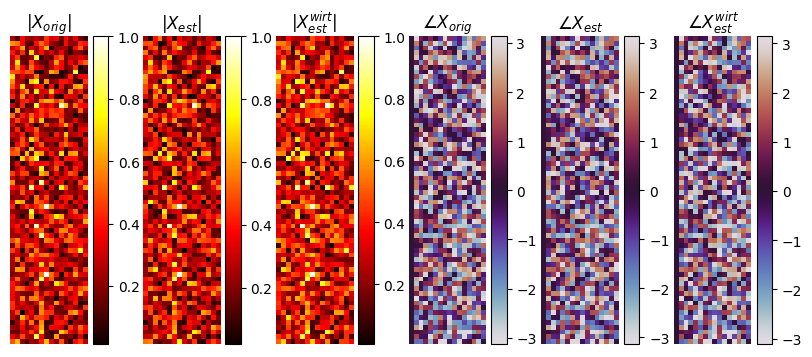

In [27]:
titles = [r"$|X_{orig}|$", r"$|X_{est}|$", r"$|X_{est}^{wirt}|$", r"$\angle X_{orig}$", r"$\angle X_{est}$" , r"$\angle X_{est}^{wirt}$"]
pls = []

fig, axs = plt.subplots(1,6, figsize=(12,4))
pls.append(axs[0].imshow(np.abs(X), cmap="hot"))
pls.append(axs[1].imshow(np.abs(X1.T), cmap="hot"))
pls.append(axs[2].imshow(np.abs(X2.T), cmap="hot"))
pls.append(axs[3].imshow(np.angle(X), cmap="twilight"))
pls.append(axs[4].imshow(np.angle(X1.T), cmap="twilight"))
pls.append(axs[5].imshow(np.angle(X2.T), cmap="twilight"))
[ plt.colorbar(pls[i], ax=axs[i]) for i in range(len(pls)) ]
[ axs[i].set_title(titles[i]) for i in range(len(pls)) ]
[ axs[i].axis('off') for i in range(len(pls)) ]